# Team Barracuda

## Decision Tree For Diving Decision

### Building The Model
* The dataset will be load and modified to use numerical values.
* Then it will be split into to parts for training and for testing.

In [1]:
# Importing modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree

import numpy as np
import pandas as pd
import csv
import graphviz 

In [2]:
# Loading data from csv file
file_path = 'diving_decision_data.csv'
data = pd.read_csv(file_path, sep = ',', header = 0)
data.head()

,Water Depth,Boat Filled,Number Above vs Below,"Visibility of the water (1-50: HIGH, 51 - 100 : MEDIUM, 101 -150:LOW)",People Below,Dive or Not
0,29,False,LOWER,5,False,NO
1,99,False,LOWER,8,True,YES
2,42,False,EQUAL,9,True,YES
3,9,True,EQUAL,10,True,NO
4,89,False,EQUAL,11,False,NO


In [3]:
# A dictionary of data values to corresponding numeric values
value_map = {
    'FALSE' : '0',
    'TRUE' : '1',
    'LOWER' : '0',
    'EQUAL' : '1',
    'HIGHER' : '2',
}

data_list = []
numeric_filepath = 'numeric_data.csv'

# Read from data file and modify values
with open(file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        newrow = []
        pos = 0
        for item in row:
            newItem = item
            if pos != 5 and item in value_map:
                newItem = item.replace(item, value_map[item])
            pos += 1
            newrow.append(newItem)
        data_list.append(newrow)
        
# Write modified values into new CSV file
with open(numeric_filepath, mode='w') as numeric_file:
    numeric_writer = csv.writer(numeric_file, delimiter=',')
    for row in data_list:
        numeric_writer.writerow(row)
    

In [4]:
new_data = pd.read_csv(numeric_filepath, sep = ',', header = 0)
new_data.head()

,Water Depth,Boat Filled,Number Above vs Below,"Visibility of the water (1-50: HIGH, 51 - 100 : MEDIUM, 101 -150:LOW)",People Below,Dive or Not
0,29,0,0,5,0,NO
1,99,0,0,8,1,YES
2,42,0,1,9,1,YES
3,9,1,1,10,1,NO
4,89,0,1,11,0,NO


In [5]:
# Identify features and results from data
features = new_data.values[:, 0:5]
results = new_data.values[:, 5]

In [6]:
# Split data set into 2 parts: one for training and the other for testing
# the trained decision tree
training_features, test_features, training_results, test_result = \
train_test_split(features, results, test_size = 0.2, random_state = 100)

In [7]:
# Create the decision treee and train with the training data
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth = 5)
classifier.fit(training_features, training_results)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

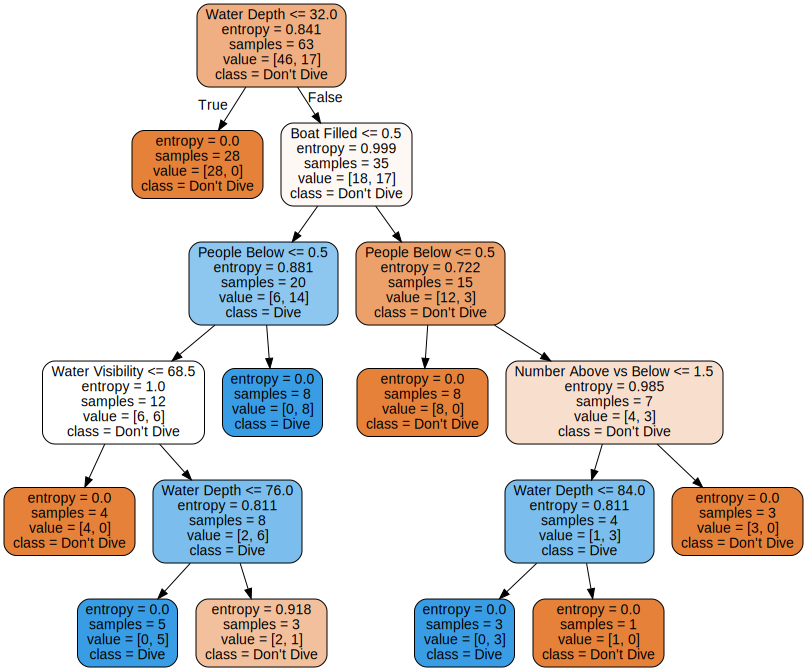

In [8]:
# Create tree visualization

feature_title = ["Water Depth",
                 "Boat Filled",
                 "Number Above vs Below",
                 "Water Visibility",
                 "People Below"]
result_title = ["Don't Dive", "Dive"]

dot_data = tree.export_graphviz(classifier, 
                                out_file=None, 
                                feature_names = feature_title, 
                                class_names=result_title,
                                filled = True,
                                rounded=True)

graph = graphviz.Source(dot_data)
graph.render("tree")
graph

### Checking Accuracy

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
# Predict the result using the test features
predict_result = classifier.predict(test_features)

In [11]:
print("Accuracy is {:.2f}%".format(accuracy_score(test_result, predict_result) * 100))  

Accuracy is 87.50%
